## 1次元Poisson方程式に対する差分法の数値計算
### 1次元Poisson方程式の混合境界値問題
$$
 \begin{aligned}
 -u''(x) &= 2 \quad x \in (0,1), \\
 u(0)  &= 0, \\ 
 u'(1) &= -1.
 \end{aligned}
$$
厳密解は $u(x) = x(1-x)$である．

この問題の近似解を差分法で求める．

In [1]:
function fdm(m)
    h =  1/m;   # 分割幅
    
    # 係数行列の構成
    a, b = 0, -1; 

    A = [if i == j   # 対角成分
             2.0
        elseif abs(i-j) == 1  # 対角 ± 1 の列
            -1.0
        else 0.0  # それ以外
        end
        for i in 1:m+1, j in 1:m+1]
    
    A[1,1] = 1.0;   A[1,2] = 0.0;     # Dirichlet BC: 第1行の書き換え
    A[m+1,m+1] = 1.0;   # Neumann BC: 最終行の書き換え
    A *= h^(-2)   
    
    # 右辺のベクトルの構成
    F = 2*ones(m+1);    
    F[1] = a/h^2;
    F[m+1] = b/h;
    return A\F
end

fdm (generic function with 1 method)

In [2]:
# 誤差の計算
m = 20 
h = 1/m
u = fdm(m)   # 差分法による近似解
uex(x) = x*(1-x)   # 厳密解の定義

# 各分点における誤差を計算し，配列として格納
err = [abs(uex((i-1)*h) - u[i]) for i in 1:m+1];  
maximum(err)    # 誤差の絶対値最大の値

0.04999999999999966

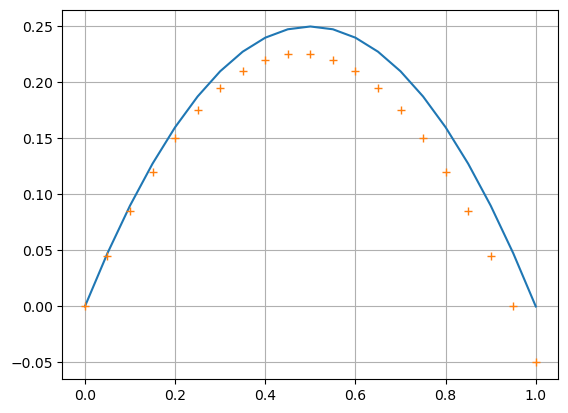

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x294c25880>

In [4]:
using PyPlot
xa = 0:h:1  # = 0, h, 2h, ..., 1-h, h の範囲
grid()
plot(0:0.05:1, uex.(0:0.05:1), ls="-")  # 厳密解のプロット
plot(xa, u, ls=" ", marker="+")  # 差分法の数値解のプロット 

## 仮想節点 (virtual/ghost point) 
先の例ではNeumann境界条件を後退差分で近似した．
これは自然なアイデアだが，厳密解は領域全体で非負であるのに対して，近似解は境界付近で負になってしまっている．
このような不都合を回避するためには境界の外側に仮想節点を導入して，Neumann境界条件を中心差分で近似する方法が知られている．　　

【参考】
- 山本哲郎，『数値解析入門（増訂版）』，サイエンス社．(pp. 198--199)

In [8]:
function fdm_ghostnode(m)
    h =  1/m;   a = 0;  b = -1;
    A = [if i == j 
             2.0
        elseif abs(i-j) == 1 
            -1.0
        else 0.0
        end
        for i in 1:m+2, j in 1:m+2]
    A[1,1] = 1.0;   A[1,2] = 0.0;   
    A[m+2,m:m+2] = [-1,0,1]
    A *= h^(-2)
    F = 2*ones(m+2);    F[1] = a/h^2;    F[m+2] = 2b/h;
    return A\F
end

fdm_ghostnode (generic function with 1 method)

maximum(err) = 4.440892098500626e-16


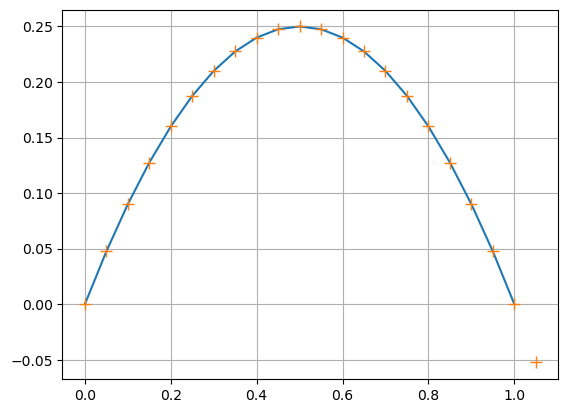

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x295f444c0>

In [10]:
m = 20; 
h = 1/m
u = fdm_ghostnode(m);
uex(x) = x*(1-x)
err = [abs(uex((i-1)*h) - u[i]) for i in 1:m+1]; 
@show maximum(err)  # 最大値誤差

# 差分法の近似解と厳密解のグラフプロット
using PyPlot
xa = 0:h:1+h
grid()
plot(0:0.05:1, uex.(0:0.05:1))
plot(xa, u, ls=" ", marker="+", ms=8)